In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
%matplotlib inline

In [2]:
# read data
df= pd.read_csv('/Users/chrisgabriel/Desktop/avocado.csv')
df.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
# rename columns
df.rename(columns={'4046':'s/m','4225':'large','4770':'xlarge'}, inplace=True )
df['Date'] = pd.to_datetime(df['Date']) # change var to date
df= df.drop(['Unnamed: 0'],axis=1) # drop column
df.head(5)

,Date,AveragePrice,Total Volume,s/m,large,xlarge,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
# counting type
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [5]:
# T will transpose the df
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
s/m,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
large,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
xlarge,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
year,18249.0,2016.147899,9.399385e-01,2015.00,2015.00,2016.00,2017.00,2018.00


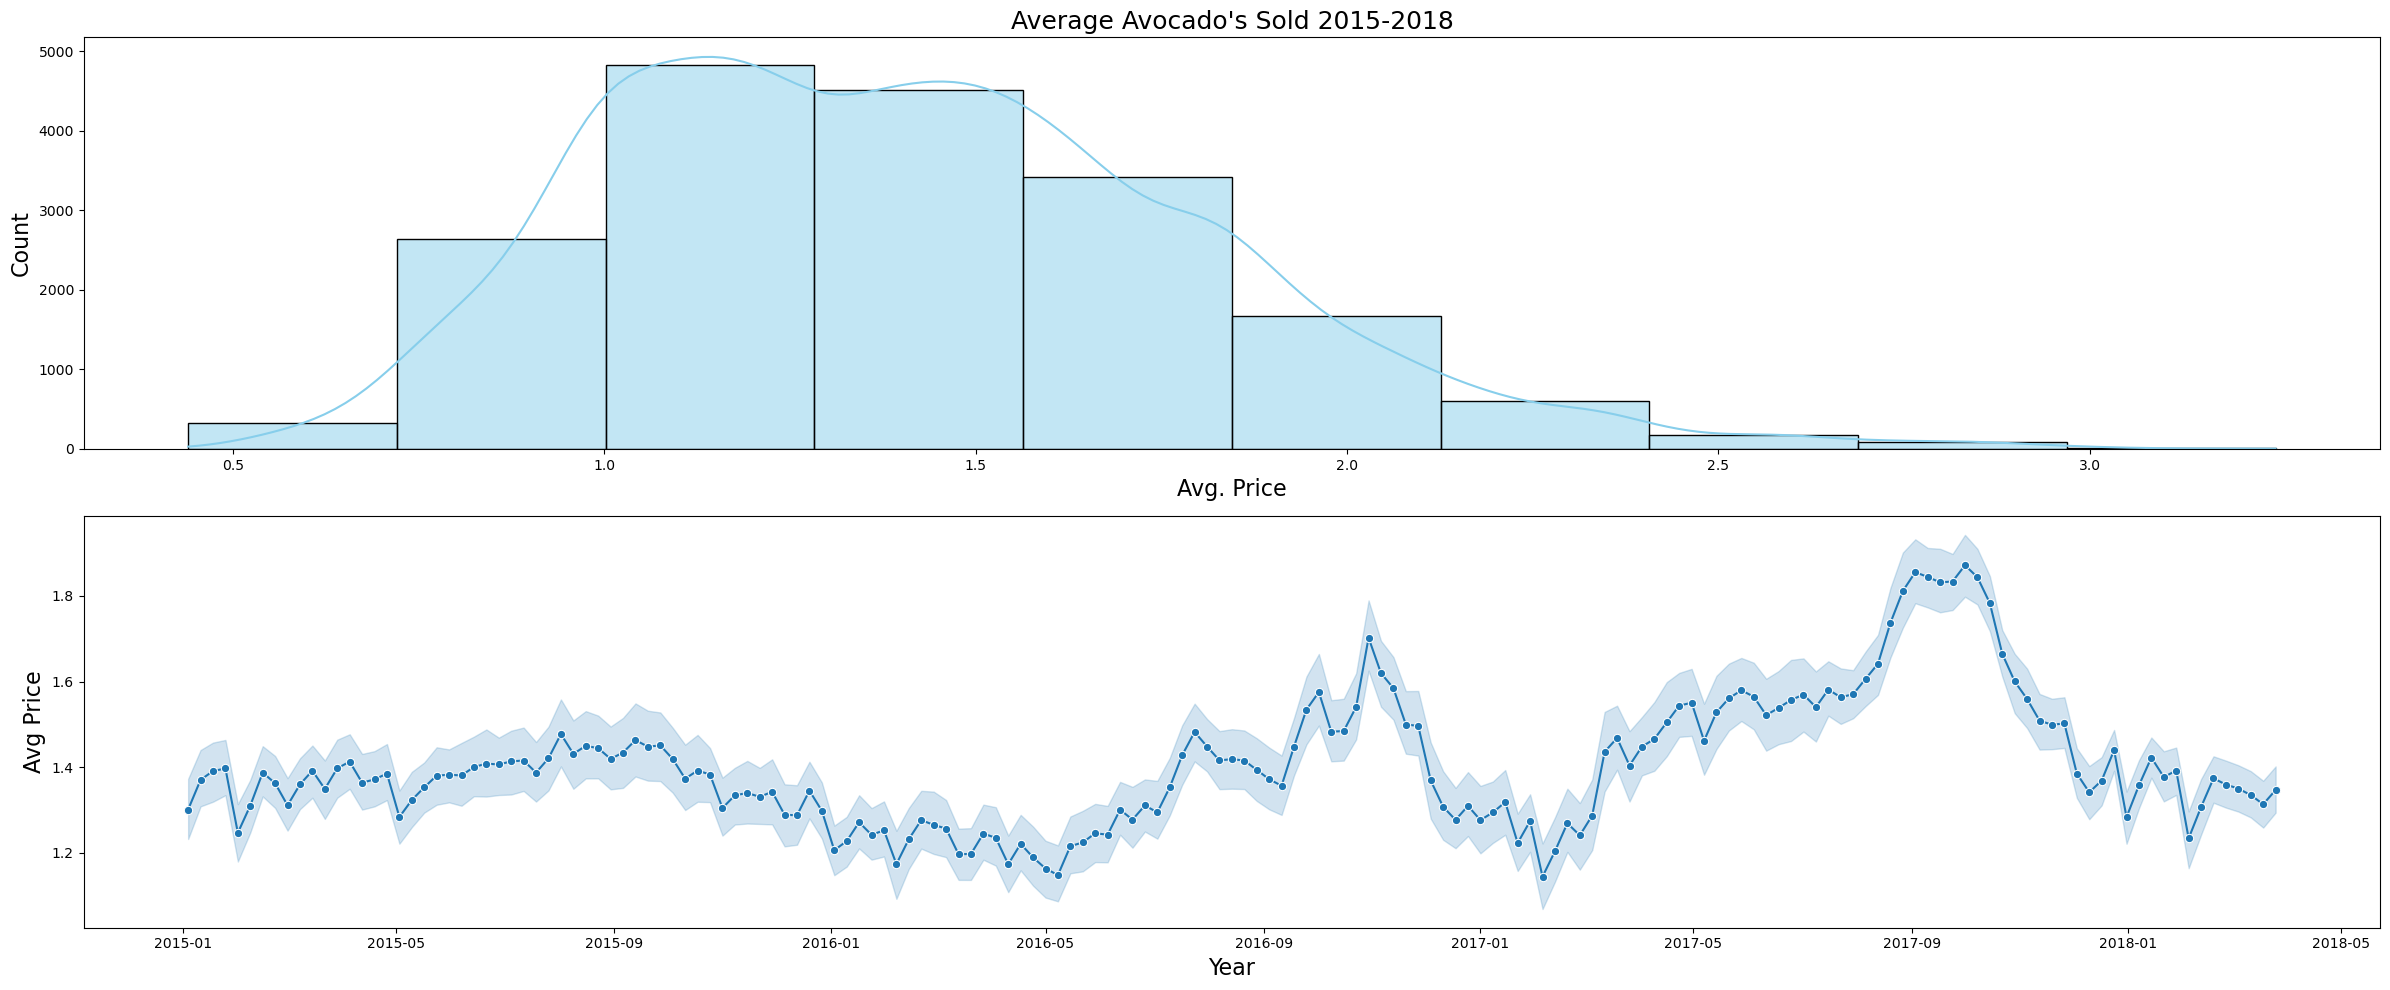

In [6]:
# subplots cord.
# type of graph
# labels
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(24, 10))

plt.subplot(2, 1, 1) 
sns.histplot(data=df, x="AveragePrice", bins=10, kde=True, color='skyblue')
plt.xlabel("Avg. Price", fontsize=16)
plt.title("Average Avocado's Sold 2015-2018", fontsize=18)
plt.ylabel("Count", fontsize=16)

plt.subplot(2, 1, 2) 
sns.lineplot(data=df, x='Date', y='AveragePrice', marker='o')
plt.xlabel("Year", fontsize=16)
plt.ylabel("Avg Price", fontsize=16)

fig.tight_layout()

plt.show()

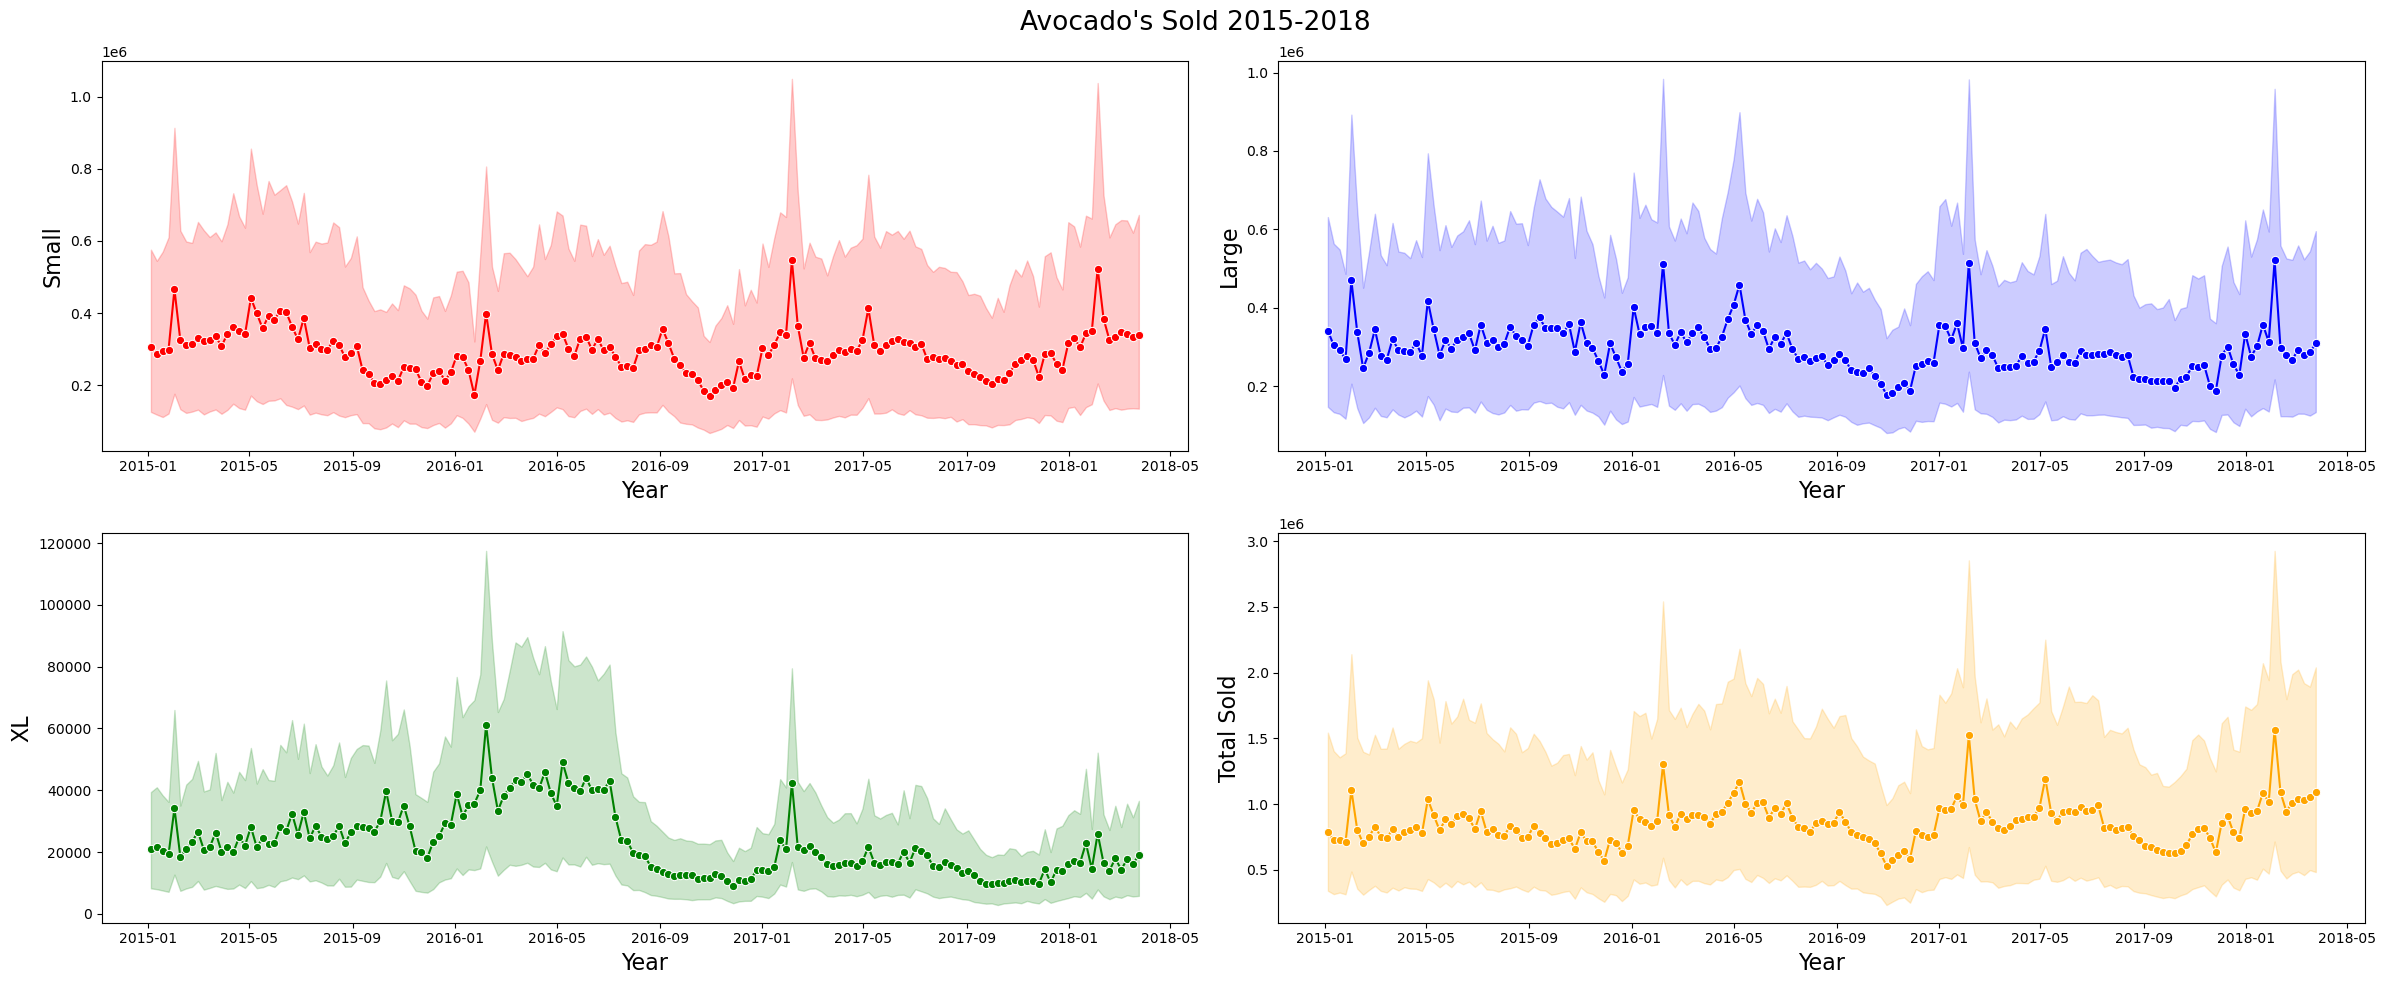

In [7]:
# same rules as above
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(24, 10))

plt.subplot(2, 2, 1) 
sns.lineplot(data=df, x='Date', y='s/m', marker='o',color='red')
plt.xlabel("Year", fontsize=16)
plt.ylabel("Small", fontsize=16)

plt.subplot(2, 2, 2) 
sns.lineplot(data=df, x='Date', y='large', marker='o',color='blue')
plt.xlabel("Year", fontsize=16)
plt.ylabel("Large", fontsize=16)

plt.subplot(2, 2, 3) 
sns.lineplot(data=df, x='Date', y='xlarge', marker='o',color='green')
plt.xlabel("Year", fontsize=16)
plt.ylabel("XL", fontsize=16)

plt.subplot(2, 2, 4) 
sns.lineplot(data=df, x='Date', y='Total Volume', marker='o',color='orange')
plt.xlabel("Year", fontsize=16)
plt.ylabel("Total Sold", fontsize=16)

plt.suptitle("Avocado's Sold 2015-2018", fontsize=19)
fig.tight_layout()

plt.show()

## Melt Data 

In [8]:
# turning columns into rows
melt_df = pd.melt(df, id_vars= ['Date', 'AveragePrice','Total Bags','Total Volume','type','year','region'],
                     value_vars=['Small Bags','Large Bags','XLarge Bags'], 
                    var_name='bag_size', value_name='bags_sold')

melt_df

,Date,AveragePrice,Total Bags,Total Volume,type,year,region,bag_size,bags_sold
0,2015-12-27,1.33,8696.87,64236.62,conventional,2015,Albany,Small Bags,8603.62
1,2015-12-20,1.35,9505.56,54876.98,conventional,2015,Albany,Small Bags,9408.07
2,2015-12-13,0.93,8145.35,118220.22,conventional,2015,Albany,Small Bags,8042.21
3,2015-12-06,1.08,5811.16,78992.15,conventional,2015,Albany,Small Bags,5677.40
4,2015-11-29,1.28,6183.95,51039.60,conventional,2015,Albany,Small Bags,5986.26
...,...,...,...,...,...,...,...,...,...
54742,2018-02-04,1.63,13498.67,17074.83,organic,2018,WestTexNewMexico,XLarge Bags,0.00
54743,2018-01-28,1.71,9264.84,13888.04,organic,2018,WestTexNewMexico,XLarge Bags,0.00
54744,2018-01-21,1.87,9394.11,13766.76,organic,2018,WestTexNewMexico,XLarge Bags,0.00
54745,2018-01-14,1.93,10969.54,16205.22,organic,2018,WestTexNewMexico,XLarge Bags,0.00


In [56]:
# quality check
melt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54747 entries, 0 to 54746
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          54747 non-null  datetime64[ns]
 1   AveragePrice  54747 non-null  float64       
 2   Total Bags    54747 non-null  float64       
 3   Total Volume  54747 non-null  float64       
 4   type          54747 non-null  object        
 5   year          54747 non-null  int64         
 6   region        54747 non-null  object        
 7   bag_size      54747 non-null  object        
 8   bags_sold     54747 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 3.8+ MB


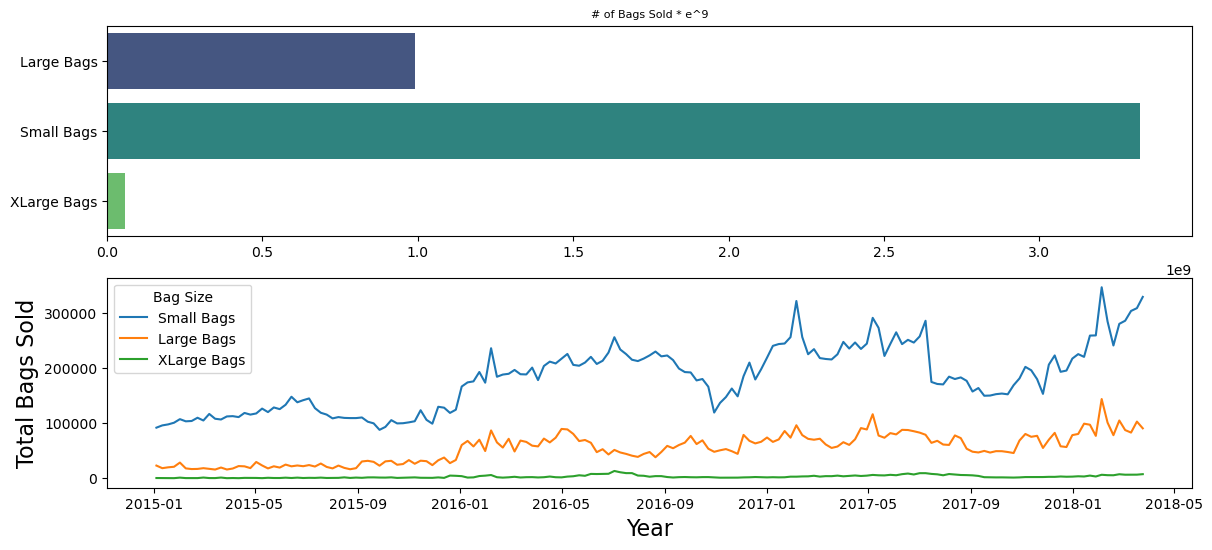

,bag_size,bags_sold
0,Large Bags,9.916158e+08
1,Small Bags,3.324871e+09
2,XLarge Bags,5.668918e+07


In [29]:
# count bar 
size_sum = melt_df.groupby('bag_size')['bags_sold'].sum().reset_index()

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 6))

# plot the barplot
plt.subplot(2, 1, 1)
sns.barplot(data=size_sum, y="bag_size", x='bags_sold', palette="viridis", orient="h")
plt.title("# of Bags Sold * e^9", fontsize=8)
plt.ylabel("", fontsize=8)
plt.xlabel(" ", fontsize=8)


plt.subplot(2, 1, 2)
sns.lineplot(data=melt_df, x='Date', y='bags_sold', hue='bag_size', ci=None)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Total Bags Sold", fontsize=16)
plt.legend(title='Bag Size')
plt.show()

size_sum